In [55]:
import numpy as np
import math

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# criteria for splits
SPL_CRITERIA = ['gini', 'entropy']
# data paths
CLEAN_REAL_PATH = "data/clean_real.txt"
CLEAN_FAKE_PATH = "data/clean_fake.txt"
# class labels
REAL_LABEL = '1'
FAKE_LABEL = '0'

In [3]:
'''
this is question 3a.
''' 

def load_data():
    f = open(CLEAN_REAL_PATH, "r")
    real_headlines = f.read().splitlines()
    f.close()

    f = open(CLEAN_FAKE_PATH, "r")
    fake_headlines = f.read().splitlines()
    f.close()

    count_real = len(real_headlines)
    count_fake = len(fake_headlines)
    count_total = count_real + count_fake
    all_headlines = np.asarray(real_headlines + fake_headlines)

    vectorizer = CountVectorizer() 
    X = vectorizer.fit_transform(all_headlines)

    real_labels = np.full((count_real, 1), REAL_LABEL)
    fake_labels = np.full((count_fake, 1), FAKE_LABEL)
    all_labels = np.append(real_labels, fake_labels)

    
    b = all_labels.reshape(1, count_total)
    y = b.T

    # 70 / 30 split into train + (test+val)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
        test_size=0.3, random_state=1)

    # then split 30 into 15 validation, 15 test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
        test_size=0.5, random_state=1)

    return X_train, X_val, X_test, y_train, y_val, y_test, count_total, vectorizer

In [22]:
X_train, X_val, X_test, y_train, y_val, y_test, count_total, vectorizer = load_data()

In [23]:
X_train.shape, X_test.shape

((2286, 5799), (490, 5799))

In [24]:
y_train.shape, y_test.shape

((2286, 1), (490, 1))

In [7]:
y_train[:10]

array([['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1']], dtype='<U1')

In [10]:
'''
this is question 3 b
'''

def fit_tree(params, X_train, y_train, X_val, y_val):
    """to fit the decision tree with a specific criteria and depth"""
    
    clf = DecisionTreeClassifier(
            max_depth=params["max_depth"], 
            criterion=params["criteria"],
            splitter="random",
    )
    # train 
    clf.fit(X=X_train, y=y_train) 

    # validate 
    y_pred = clf.predict(X=X_val)
    correct = sum(i == j for i, j in zip(y_pred, y_val))
    score = correct / y_val.shape[0]
    print(f"max_depth: {params['max_depth']} | criteria: {params['criteria']} | score: {score}")

    return score, clf



def select_tree_model(X_train, y_train, X_val, y_val, max_depth):
    best_score = -1
    best_tree = None
    
    # make different params 
    params = []
    for i in range(1, max_depth+1):
        for criteria in SPL_CRITERIA:
            params.append({
                "max_depth": i,
                "criteria": criteria 
            })
    
    # fit and validate on each param
    for param in params:
        score, clf = fit_tree(param, X_train, y_train, X_val, y_val)
        if (score > best_score):
            best_score = score
            best_tree = clf

    print(f"Best hyperparameters are: max_depth = {best_tree.max_depth}, criteria = {best_tree.criterion}, score = {best_score}")

    return best_tree

In [18]:
clf = select_tree_model(X_train, y_train, X_val, y_val, 20)

max_depth: 1 | criteria: gini | score: [0.58979592]
max_depth: 1 | criteria: entropy | score: [0.58979592]
max_depth: 2 | criteria: gini | score: [0.67959184]
max_depth: 2 | criteria: entropy | score: [0.61632653]
max_depth: 3 | criteria: gini | score: [0.67346939]
max_depth: 3 | criteria: entropy | score: [0.6244898]
max_depth: 4 | criteria: gini | score: [0.63877551]
max_depth: 4 | criteria: entropy | score: [0.71020408]
max_depth: 5 | criteria: gini | score: [0.71020408]
max_depth: 5 | criteria: entropy | score: [0.65102041]
max_depth: 6 | criteria: gini | score: [0.71428571]
max_depth: 6 | criteria: entropy | score: [0.70408163]
max_depth: 7 | criteria: gini | score: [0.67346939]
max_depth: 7 | criteria: entropy | score: [0.7244898]
max_depth: 8 | criteria: gini | score: [0.72244898]
max_depth: 8 | criteria: entropy | score: [0.67346939]
max_depth: 9 | criteria: gini | score: [0.72040816]
max_depth: 9 | criteria: entropy | score: [0.71428571]
max_depth: 10 | criteria: gini | score:

In [27]:
'''
question 3 c
'''

TEST_DATA_X = 'data/data_test_X.csv'
TEST_DATA_y = 'data/data_test_y.csv'

BEST_PARAMS = {
    'max_depth' : 23,
    'criteria' : 'entropy',
}

def test_model():
#     f = open(TEST_DATA_X, "r")
#     X_test = f.read()
#     f.close()
    
#     f = open(TEST_DATA_y, "r")
#     y_test = f.read()
#     f.close()
    
    y_out = clf.predict(X_test)
    
    return y_out
    

In [28]:
y_out = test_model()
y_out

array(['1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1

In [56]:
# accuracy 
accuracy_score(y_test, y_out)

0.7571428571428571

In [53]:
# plotting the first 2 layers

def visualize(clf):
    plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
    tree.plot_tree(clf, max_depth=2, filled = True, fontsize=10)
    plt.show()
    plt.savefig('tree_depth_2', dpi=100)

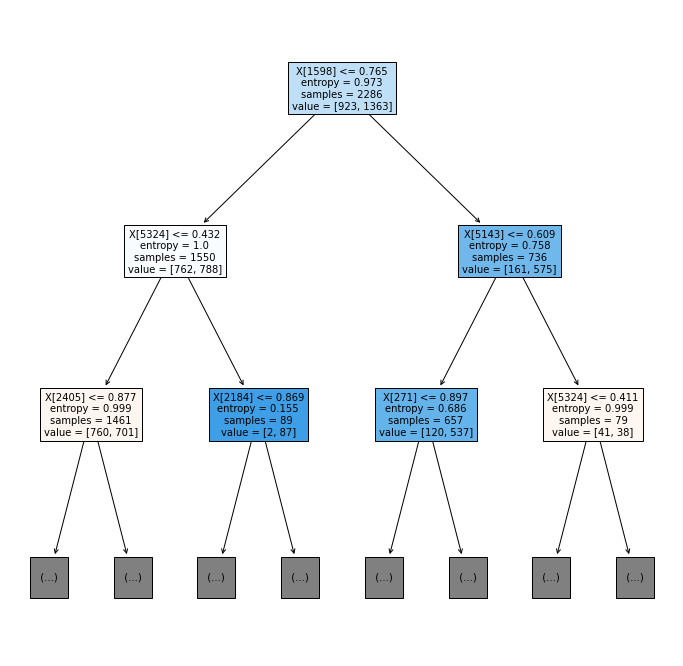

<Figure size 432x288 with 0 Axes>

In [54]:
visualize(clf)